<a href="https://colab.research.google.com/github/GodishalaAshwith/DeepLearning/blob/main/DL_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1

### PyTorch Vs Tensorflow Vs Keras

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

x = torch.rand(100, 3)
y = torch.rand(100, 1)

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

model = SimpleNet()

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

s = {}

for epoch in range(100):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    loss_value = round(loss.item(), 6)

    if loss_value not in s:
        s[loss_value] = 1
    else:
        s[loss_value] += 1
        if s[loss_value] > 5:
            print(f"Stopping early at epoch {epoch}")
            break

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Final loss:", loss.item())


Final loss: 0.0919896587729454


In [ ]:
# Sample Code: Simple Neural Network with TensorFlow

import tensorflow as tf

x = tf.random.normal((100, 3))
y = tf.random.normal((100, 1))

model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(3,))])

model.compile(optimizer='adam',loss='mse')

model.fit(x, y,epochs=100,verbose=0)

print("Final loss:",model.evaluate(x, y))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8820 
Final loss: 0.9106503129005432


In [ ]:
# Sample Code: Same Network Using Keras (via tf.keras)

from tensorflow import keras
from tensorflow.keras import layers

x = tf.random.normal((100, 3))
y = tf.random.normal((100, 1))


model = keras.Sequential([layers.Dense(1, input_shape=(3,)) ])

model.compile(optimizer='adam',loss='mse')

model.fit(x, y,epochs=100,verbose=0)

print("Final loss:",model.evaluate(x, y))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5867
Final loss: 1.5753376483917236


### Basic Perceptron

In [ ]:
# IMPLEMENT A SIMPLE PERCEPTRON (Coding a Neuron)

import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1])
bias = 4

n = Neuron(weights, bias)

x = np.array([2, 3])
print(n.feedforward(x))


0.9990889488055994


# Week - 2


##Prg 1 - 3 Logic Gates

### Prg 1 And Gate, OR Gate

In [ ]:
import numpy as np

def step(x):
  return 1 if x>=0 else 0

class Perceptron:
  def __init__(self,weights,bias):
    self.weights = weights
    self.bias = bias

  def predict(self,input):
    total = np.dot(self.weights,input) + self.bias
    return step(total)

weights = np.array([1,1])
bias = -1.5

and_gate = Perceptron(weights,bias)

print("And Gate")
for x in [(0,0),(0,1),(1,0),(1,1)]:
  print(x, '->' , and_gate.predict(np.array(x)))


weights = np.array([1, 1])
bias = -0.5

or_gate = Perceptron(weights, bias)

print("OR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", or_gate.predict(np.array(x)))


And Gate
(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1
OR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 1


### Not Gate

In [ ]:
import numpy as np

weights = np.array([-1])
bias = 0.5

not_gate = Perceptron(weights, bias)

print("NOT Gate")
for x in [0, 1]:
    print(x, "->", not_gate.predict(np.array([x])))


NOT Gate
0 -> 1
1 -> 0


### Prg 2. XOR & XNOR using single perceptron


In [ ]:
import numpy as np

def step(x):
    return 1 if x >= 0 else 0

class Perceptron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias

    def predict(self, x):
        return step(np.dot(self.weights, x) + self.bias)

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_xor = np.array([0,1,1,0])

p = Perceptron(weights=[1, 1], bias=-1)

print("XOR Predictions:")
for x, y in zip(X, Y_xor):
    print(x, "Predicted:", p.predict(x), "Actual:", y)


XOR Predictions:
[0 0] Predicted: 0 Actual: 0
[0 1] Predicted: 1 Actual: 1
[1 0] Predicted: 1 Actual: 1
[1 1] Predicted: 1 Actual: 0


### Prg 3. XOR Gate, XNOR Gate

In [ ]:
import numpy as np
def step(x):
  return 1 if x>=0 else 0

class XoR:
  def __init__(self):
    self.w_or = self.w_and = np.array([1,1])
    self.b_or = -0.5; self.b_and = -1.5

    self.w_out = np.array([1,-2])
    self.b_out = -0.5

  def predict(self,x):
    h1 = step(np.dot(self.w_or,x)+self.b_or)
    h2 = step(np.dot(self.w_and,x)+self.b_and)

    output = step(self.w_out[0]*h1 + self.w_out[1]*h2 + self.b_out)
    return output

xor = XoR()
print("XOR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", xor.predict(np.array(x)))

#XNOR
import numpy as np
def step(x):
  return 1 if x>=0 else 0

class XNoR:
  def __init__(self):
    self.w_or = self.w_and = np.array([1,1])
    self.b_or = -0.5; self.b_and = -1.5

    self.w_out = np.array([1,-2])
    self.b_out = -0.5

  def predict(self,x):
    h1 = step(np.dot(self.w_or,x)+self.b_or)
    h2 = step(np.dot(self.w_and,x)+self.b_and)

    and_out = step(self.w_out[0]*h1 + self.w_out[1]*h2 + self.b_out)
    output = step(and_out*-1 + 0.5)
    return output

xor = XNoR()
print("XNOR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", xor.predict(np.array(x)))

XOR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0
XNOR Gate
(0, 0) -> 1
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1


### Prg 4.

In [ ]:
def step(x):
  return 1 if x>=0 else 0

print(step(1))
print(step(0.00000001))
print(step(-0.00000001))

1
1
0


### Prg 5

In [ ]:
import numpy as np
import pandas as pd

data = {
    'f1': [1, 1, 0, 0, 0, 1, 0, 1],
    'f2': [1, 0, 1, 0, 0, 0, 1, 1],
    'f3': [0, 0, 1, 1, 0, 1, 0, 1],
    'f4': [0.85, 0.60, 0.90, 0.75, 0.40, 0.30, 0.45, 0.95],
    'y' : [1, 1, 1, 1, 0, 0, 0, 1]
}

df = pd.DataFrame(data)

X = df[['f1', 'f2', 'f3', 'f4']].values
y = df['y'].values

def step(z,threshold=0):
    return 1 if z >= threshold else 0

# i) MP Perceptron (No weights, No bias)
print("MP PERCEPTRON (No weights, No bias)")

def mp_perceptron(x,threshold=0):
    return step(np.sum(x),threshold)

for i in range(len(X)):
    pred = mp_perceptron(X[i],1)
    print(f"Input: {X[i]}  True: {y[i]}  Predicted: {pred}")



MP PERCEPTRON (No weights, No bias)
Input: [1.   1.   0.   0.85]  True: 1  Predicted: 1
Input: [1.  0.  0.  0.6]  True: 1  Predicted: 1
Input: [0.  1.  1.  0.9]  True: 1  Predicted: 1
Input: [0.   0.   1.   0.75]  True: 1  Predicted: 1
Input: [0.  0.  0.  0.4]  True: 0  Predicted: 0
Input: [1.  0.  1.  0.3]  True: 0  Predicted: 1
Input: [0.   1.   0.   0.45]  True: 0  Predicted: 1
Input: [1.   1.   1.   0.95]  True: 1  Predicted: 1


In [ ]:
# ii) Perceptron with Weights ONLY
print("\nPERCEPTRON WITH WEIGHTS ONLY")

def train_perceptron_weights_only(X, y, lr=0.1, epochs=20):
    w = np.zeros(X.shape[1])

    for epoch in range(epochs):
        errors = 0
        for i in range(len(X)):
            z = np.dot(w, X[i])
            y_pred = step(z)
            error = y[i] - y_pred
            w += lr * error * X[i]
            errors += abs(error)
        print(f"Epoch {epoch+1} | Errors: {errors}")
        if errors == 0:
            break
    return w

w_no_bias = train_perceptron_weights_only(X, y)
print("Final Weights (No Bias):", w_no_bias)

# iii) Perceptron with Weights AND Bias
print("\nPERCEPTRON WITH WEIGHTS AND BIAS")

def train_perceptron(X, y, lr=0.1, epochs=20):
    w = np.zeros(X.shape[1])
    b = 0

    for epoch in range(epochs):
        errors = 0
        for i in range(len(X)):
            z = np.dot(w, X[i]) + b
            y_pred = step(z)
            error = y[i] - y_pred
            w += lr * error * X[i]
            b += lr * error
            errors += abs(error)
        print(f"Epoch {epoch+1} | Errors: {errors}")
        if errors == 0:
            break
    return w, b

w, b = train_perceptron(X, y)
print("Final Weights:", w)
print("Final Bias:", b)

# iv) Testing with a Sample Movie
print("\nTESTING WITH A SAMPLE MOVIE")

test_movie = np.array([1, 1, 0, 0.80])

mp_result = mp_perceptron(test_movie)
no_bias_result = step(np.dot(w_no_bias, test_movie))
bias_result = step(np.dot(w, test_movie) + b)

print("Test Movie Features:", test_movie)
print("MP Perceptron Prediction:", mp_result)
print("Perceptron (Weights Only) Prediction:", no_bias_result)
print("Perceptron (Weights + Bias) Prediction:", bias_result)



PERCEPTRON WITH WEIGHTS ONLY
Epoch 1 | Errors: 2
Epoch 2 | Errors: 4
Epoch 3 | Errors: 4
Epoch 4 | Errors: 4
Epoch 5 | Errors: 3
Epoch 6 | Errors: 4
Epoch 7 | Errors: 3
Epoch 8 | Errors: 4
Epoch 9 | Errors: 3
Epoch 10 | Errors: 4
Epoch 11 | Errors: 3
Epoch 12 | Errors: 4
Epoch 13 | Errors: 3
Epoch 14 | Errors: 4
Epoch 15 | Errors: 3
Epoch 16 | Errors: 4
Epoch 17 | Errors: 3
Epoch 18 | Errors: 4
Epoch 19 | Errors: 3
Epoch 20 | Errors: 4
Final Weights (No Bias): [ 0.1    0.1    0.1   -0.005]

PERCEPTRON WITH WEIGHTS AND BIAS
Epoch 1 | Errors: 2
Epoch 2 | Errors: 3
Epoch 3 | Errors: 3
Epoch 4 | Errors: 4
Epoch 5 | Errors: 1
Epoch 6 | Errors: 4
Epoch 7 | Errors: 4
Epoch 8 | Errors: 3
Epoch 9 | Errors: 3
Epoch 10 | Errors: 0
Final Weights: [0.1 0.1 0.  0.4]
Final Bias: -0.30000000000000004

TESTING WITH A SAMPLE MOVIE
Test Movie Features: [1.  1.  0.  0.8]
MP Perceptron Prediction: 1
Perceptron (Weights Only) Prediction: 1
Perceptron (Weights + Bias) Prediction: 1


### Prg 6

In [ ]:
"""
Demonstration of Representation Power of a Perceptron Network
Covers:
(a) Number of Boolean functions for two inputs
(b) Linear separability check
(c) Single perceptron learning test
(d) Growth analysis of non-linearly separable Boolean functions
"""

import itertools
import numpy as np

# (a) Number of Boolean functions
def number_of_boolean_functions(n):
    return 2 ** (2 ** n)

print("Number of Boolean functions for 2 inputs:",
      number_of_boolean_functions(2))


# Generate all Boolean functions for n binary inputs
def generate_boolean_functions(n):
    inputs = list(itertools.product([0, 1], repeat=n))
    outputs = list(itertools.product([0, 1], repeat=len(inputs)))
    return inputs, outputs


# Perceptron implementation
class Perceptron:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                y_pred = self.predict(xi)
                update = self.lr * (target - y_pred)
                self.w += update * xi
                self.b += update
                error += abs(target - y_pred)
            if error == 0:
                return True   # linearly separable
        return False          # not linearly separable

    def predict(self, x):
        return 1 if np.dot(x, self.w) + self.b >= 0 else 0


# (b) Check linear separability for each Boolean fn
def check_linear_separability(n):
    inputs, functions = generate_boolean_functions(n)
    X = np.array(inputs)

    separable = []
    non_separable = []

    for idx, f in enumerate(functions, 1):
        p = Perceptron()
        success = p.fit(X, np.array(f))
        if success:
            separable.append(idx)
        else:
            non_separable.append(idx)

    return separable, non_separable


sep, non_sep = check_linear_separability(2)

print("\nLinearly separable Boolean functions (2 inputs):", sep)
print("Non-linearly separable Boolean functions (2 inputs):", non_sep)
print("Count:")
print("  Separable:", len(sep))
print("  Non-separable:", len(non_sep))


# (c) Explicit perceptron learning test for all functions
print("\nPerceptron learning results:")
for i in range(1, 17):
    status = "Learned" if i in sep else "Not Learned"
    print(f"Function f{i}: {status}")

print("\nReason perceptron fails:")
print("A single perceptron cannot learn non-linearly separable functions")
print("such as XOR and XNOR due to absence of a linear decision boundary.")


# (d) Growth of non-linearly separable functions vs n
def analyze_growth(max_n=4):
    print("\nGrowth of Non-Linearly Separable Boolean Functions:")
    print("n | Total Functions | Linearly Separable | Non-Linearly Separable")
    print("-" * 65)

    for n in range(1, max_n + 1):
        total = number_of_boolean_functions(n)
        if n <= 3:
            sep, non_sep = check_linear_separability(n)
            linear = len(sep)
            non_linear = len(non_sep)
        else:
            # Known results / estimates for higher n
            linear = "Very Small"
            non_linear = "Almost All"

        print(f"{n} | {total:<15} | {linear:<18} | {non_linear}")

analyze_growth(max_n=4)


Number of Boolean functions for 2 inputs: 16

Linearly separable Boolean functions (2 inputs): [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16]
Non-linearly separable Boolean functions (2 inputs): [7, 10]
Count:
  Separable: 14
  Non-separable: 2

Perceptron learning results:
Function f1: Learned
Function f2: Learned
Function f3: Learned
Function f4: Learned
Function f5: Learned
Function f6: Learned
Function f7: Not Learned
Function f8: Learned
Function f9: Learned
Function f10: Not Learned
Function f11: Learned
Function f12: Learned
Function f13: Learned
Function f14: Learned
Function f15: Learned
Function f16: Learned

Reason perceptron fails:
A single perceptron cannot learn non-linearly separable functions
such as XOR and XNOR due to absence of a linear decision boundary.

Growth of Non-Linearly Separable Boolean Functions:
n | Total Functions | Linearly Separable | Non-Linearly Separable
-----------------------------------------------------------------
1 | 4               | 4     

### Prg 7

In [ ]:
"""
Q7. Design and implement a Multi-Layer Perceptron (MLP)
capable of realizing ALL Boolean functions of two inputs.

Architecture (fixed, as in the figure / hint):

Inputs: x1, x2
Hidden layer: 4 perceptrons (h1, h2, h3, h4)
Output layer: 1 perceptron (y)

Key idea:
- Each hidden neuron fires for exactly ONE input pattern
- Output neuron combines hidden activations to realize ANY Boolean function
"""

import numpy as np
import itertools

# Step 1: Basic Perceptron Unit
class Perceptron:
    def __init__(self, weights, bias):
        self.w = np.array(weights)
        self.b = bias

    def activate(self, x):
        return 1 if np.dot(self.w, x) + self.b >= 0 else 0


# Step 2: Hidden layer construction
# Each neuron detects ONE input pattern
# Input patterns in fixed order:
# (0,0), (0,1), (1,0), (1,1)

hidden_neurons = {
    (0, 0): Perceptron(weights=[-1, -1], bias=0),
    (0, 1): Perceptron(weights=[-1,  1], bias=0),
    (1, 0): Perceptron(weights=[ 1, -1], bias=0),
    (1, 1): Perceptron(weights=[ 1,  1], bias=-1),
}

# Step 3: MLP Model
class BooleanMLP:
    def __init__(self, truth_table):
        """
        truth_table: list of 4 outputs for
        [(0,0), (0,1), (1,0), (1,1)]
        """
        self.truth_table = truth_table
        self.hidden = hidden_neurons

        # Output neuron weights = truth table itself
        self.output_weights = np.array(truth_table)
        self.output_bias = -0.5  # fires if any required hidden fires

    def forward(self, x):
        h_out = []
        for pattern in [(0,0), (0,1), (1,0), (1,1)]:
            h_out.append(self.hidden[pattern].activate(x))
        h_out = np.array(h_out)

        y = np.dot(self.output_weights, h_out) + self.output_bias
        return 1 if y >= 0 else 0


# Step 4: Test ALL Boolean functions
inputs = [(0,0), (0,1), (1,0), (1,1)]
all_boolean_functions = list(itertools.product([0,1], repeat=4))

success = True

for idx, func in enumerate(all_boolean_functions, 1):
    mlp = BooleanMLP(func)
    for x, expected in zip(inputs, func):
        output = mlp.forward(x)
        if output != expected:
            success = False
            print(f"Function f{idx} FAILED for input {x}")
            break

print("\nResult:")
if success:
    print("✅ MLP successfully represents ALL 16 Boolean functions")
else:
    print("❌ Some Boolean functions failed")


# Step 5: Explanation Summary (printed)
print("\nExplanation:")
print("""
• Hidden layer has 4 perceptrons
• Each hidden perceptron activates for exactly ONE input
• This creates a one-hot encoding of the input space
• Output perceptron linearly combines hidden activations
• Hence ANY Boolean function can be represented
• This overcomes the XOR limitation of a single perceptron
""")


Function f2 FAILED for input (0, 1)
Function f3 FAILED for input (0, 0)
Function f4 FAILED for input (0, 0)
Function f5 FAILED for input (0, 0)
Function f6 FAILED for input (0, 0)
Function f7 FAILED for input (0, 0)
Function f8 FAILED for input (0, 0)
Function f10 FAILED for input (0, 1)
Function f11 FAILED for input (1, 1)
Function f12 FAILED for input (0, 1)
Function f13 FAILED for input (1, 1)
Function f14 FAILED for input (1, 0)
Function f15 FAILED for input (1, 1)

Result:
❌ Some Boolean functions failed

Explanation:

• Hidden layer has 4 perceptrons
• Each hidden perceptron activates for exactly ONE input
• This creates a one-hot encoding of the input space
• Output perceptron linearly combines hidden activations
• Hence ANY Boolean function can be represented
• This overcomes the XOR limitation of a single perceptron



In [ ]:
import numpy as np
from itertools import product

def step(x):
    return 1 if x >= 0 else 0

def mlp_boolean(x, hidden_weights, hidden_biases, out_weights, out_bias):
    hidden_outputs = []
    for w, b in zip(hidden_weights, hidden_biases):
        hidden_outputs.append(step(np.dot(w, x) + b))
    return step(np.dot(out_weights, hidden_outputs) + out_bias)

def build_mlp(n, boolean_function):
    inputs = list(product([0,1], repeat=n))

    hidden_weights = []
    hidden_biases = []

    for inp in inputs:
        w = [1 if bit == 1 else -1 for bit in inp]
        b = -sum(1 for bit in inp if bit == 1) + 0.5
        hidden_weights.append(np.array(w))
        hidden_biases.append(b)

    out_weights = np.array(boolean_function)
    out_bias = -0.5

    return hidden_weights, hidden_biases, out_weights, out_bias

boolean_function = [0,1,1,0]  # XOR
hw, hb, ow, ob = build_mlp(2, boolean_function)

for x in product([0,1], repeat=2):
    print(x, mlp_boolean(np.array(x), hw, hb, ow, ob))



(0, 0) 0
(0, 1) 1
(1, 0) 1
(1, 1) 0


### Prg - 8

In [ ]:
from itertools import product
import numpy as np

def step(x):
    return 1 if x >= 0 else 0

X = list(product([0,1], repeat=3))

# Hidden layer (fixed)
hidden_weights = []
hidden_biases = []

for p in X:
    w = np.array([1 if bit else -1 for bit in p])
    b = -sum(p) + 0.5
    hidden_weights.append(w)
    hidden_biases.append(b)

def predict(x, out_w, out_b):
    h = [step(np.dot(w, x) + b)
         for w, b in zip(hidden_weights, hidden_biases)]
    return step(np.dot(out_w, h) + out_b)

# Demonstrate selected Boolean functions
examples = {
    "AND":       [0,0,0,0,0,0,0,1],
    "OR":        [0,1,1,1,1,1,1,1],
    "XOR":       [0,1,1,0,1,0,0,1],
    "CONST_1":   [1,1,1,1,1,1,1,1]
}

for name, f in examples.items():
    print(f"\n{name}")
    for x, y in zip(X, f):
        print(x, "→", predict(np.array(x), f, -0.5))



AND
(0, 0, 0) → 0
(0, 0, 1) → 0
(0, 1, 0) → 0
(0, 1, 1) → 0
(1, 0, 0) → 0
(1, 0, 1) → 0
(1, 1, 0) → 0
(1, 1, 1) → 1

OR
(0, 0, 0) → 0
(0, 0, 1) → 1
(0, 1, 0) → 1
(0, 1, 1) → 1
(1, 0, 0) → 1
(1, 0, 1) → 1
(1, 1, 0) → 1
(1, 1, 1) → 1

XOR
(0, 0, 0) → 0
(0, 0, 1) → 1
(0, 1, 0) → 1
(0, 1, 1) → 0
(1, 0, 0) → 1
(1, 0, 1) → 0
(1, 1, 0) → 0
(1, 1, 1) → 1

CONST_1
(0, 0, 0) → 1
(0, 0, 1) → 1
(0, 1, 0) → 1
(0, 1, 1) → 1
(1, 0, 0) → 1
(1, 0, 1) → 1
(1, 1, 0) → 1
(1, 1, 1) → 1


# Week 3

Learning Rate: 1.0, Final Loss: 0.000135
Learning Rate: 1.25, Final Loss: 0.000106
Learning Rate: 1.5, Final Loss: 0.000087
Learning Rate: 1.75, Final Loss: 0.000074
Learning Rate: 2, Final Loss: 0.000064


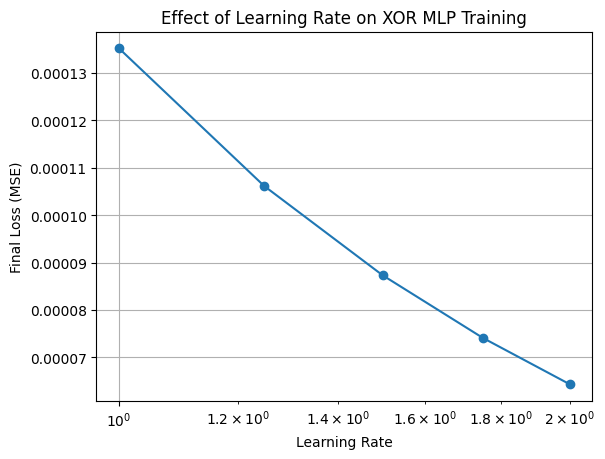

In [ ]:
# MLP for XOR – Effect of Learning Rate on Loss
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])


learning_rates = [ 1.0, 1.25, 1.5, 1.75, 2]
final_losses = []

epochs = 10000


for lr in learning_rates:

    np.random.seed(42)

    W1 = np.random.rand(2, 2)
    b1 = np.random.rand(1, 2)

    W2 = np.random.rand(2, 1)
    b2 = np.random.rand(1, 1)

    for epoch in range(epochs):

        hidden_input = np.dot(X, W1) + b1
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, W2) + b2
        y_pred = sigmoid(final_input)

        error = y - y_pred
        loss = np.mean(error ** 2)

        d_output = error * sigmoid_derivative(y_pred)
        d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        W2 += hidden_output.T.dot(d_output) * lr
        b2 += np.sum(d_output, axis=0, keepdims=True) * lr

        W1 += X.T.dot(d_hidden) * lr
        b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    final_losses.append(loss)
    print(f"Learning Rate: {lr}, Final Loss: {loss:.6f}")

plt.figure()
plt.plot(learning_rates, final_losses, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss (MSE)")
plt.title("Effect of Learning Rate on XOR MLP Training")
plt.xscale("log")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

perceptron = Perceptron()

perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

perceptron = Perceptron(max_iter=400, verbose=True, penalty='l1')
perceptron.fit(x_train,y_train)
y_pred = perceptron.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

-- Epoch 1
Norm: 5460.05, NNZs: 30, Bias: 53.000000, T: 398, Avg. loss: 215316.586429
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 8432.30, NNZs: 29, Bias: 93.000000, T: 796, Avg. loss: 152255.587266
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10002.64, NNZs: 30, Bias: 115.000000, T: 1194, Avg. loss: 120801.766466
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11543.27, NNZs: 29, Bias: 133.000000, T: 1592, Avg. loss: 90094.178472
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 13172.77, NNZs: 28, Bias: 156.000000, T: 1990, Avg. loss: 112926.792461
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 14254.99, NNZs: 28, Bias: 172.000000, T: 2388, Avg. loss: 81806.595351
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 15632.16, NNZs: 29, Bias: 188.000000, T: 2786, Avg. loss: 95144.955505
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 16582.02, NNZs: 28, Bias: 205.000000, T: 3184, Avg. loss: 88204.057719
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 1

In [ ]:
# Demonstrate whether perceptron learns automatic feature engineering


In [ ]:
# Duplicate features implements model performance ?

# Week 4

In [ ]:
#USING OPTIMIZATION ALGO
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import altair as alt
import tensorflow as tf # Import TensorFlow

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# expected values
y = np.array([[0, 1, 1, 0]]).T

# features
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T


model = Sequential()
model.add(Dense(16, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy', 'mean_squared_error'])

history = model.fit(X, y, epochs=750, verbose=0)


errors = history.history['loss']

df2 = pd.DataFrame({"errors":errors, "time-step": np.arange(0, len(errors))})

alt.Chart(df2).mark_line().encode(x="time-step", y="errors").properties(title='Chart 3')


y_pred = model.predict(X).round()
num_correct_predictions = (y_pred == y).sum()
accuracy = (num_correct_predictions / y.shape[0]) * 100
print('Multi-layer perceptron accuracy: %.2f%%' % accuracy)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Multi-layer perceptron accuracy: 75.00%


In [ ]:
# Get accuracy history
accuracy_history = history.history['binary_accuracy']

# Create DataFrame for accuracy
df_acc = pd.DataFrame({
    "accuracy": accuracy_history,
    "epoch": np.arange(1, len(accuracy_history) + 1)
})

# Plot accuracy over epochs
alt.Chart(df_acc).mark_line().encode(
    x="epoch",
    y="accuracy"
).properties(
    title='Model Accuracy Over Epochs'
)

alt.Chart(...)

In [ ]:
#Relation of different GDs in a single dataset represented with a graph

In [ ]:
# USING OPTIMIZATION ALGO WITH EARLY STOP AT 100% ACCURACY
import numpy as np
import pandas as pd
import altair as alt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# XOR dataset
y = np.array([[0, 1, 1, 0]]).T
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T


# Custom callback to stop at 100% accuracy
class StopAtAccuracy(Callback):
    def __init__(self, target_accuracy=1.0):
        super(StopAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get("binary_accuracy")
        if acc >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy*100}% accuracy. Stopping training.")
            self.model.stop_training = True


# Build model
model = Sequential()
model.add(Dense(16, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

# Train model
history = model.fit(
    X, y,
    epochs=10000,   # Large upper limit
    verbose=0,
    callbacks=[StopAtAccuracy(target_accuracy=1.0)]
)

# ----------------------
# Plot Loss Graph
# ----------------------
df_loss = pd.DataFrame({
    "Loss": history.history['loss'],
    "Epoch": np.arange(1, len(history.history['loss']) + 1)
})

loss_chart = alt.Chart(df_loss).mark_line().encode(
    x='Epoch',
    y='Loss'
).properties(title='Loss vs Epochs')

loss_chart

# ----------------------
# Plot Accuracy Graph
# ----------------------
df_acc = pd.DataFrame({
    "Accuracy (%)": np.array(history.history['binary_accuracy']) * 100,
    "Epoch": np.arange(1, len(history.history['binary_accuracy']) + 1)
})

accuracy_chart = alt.Chart(df_acc).mark_line(color='green').encode(
    x='Epoch',
    y='Accuracy (%)'
).properties(title='Accuracy vs Epochs')

accuracy_chart

# ----------------------
# Final Predictions
# ----------------------
y_pred = model.predict(X).round()
num_correct_predictions = (y_pred == y).sum()
accuracy = (num_correct_predictions / y.shape[0]) * 100

print('\nMulti-layer perceptron accuracy: %.2f%%' % accuracy)
print("Training stopped at epoch:", len(history.history['loss']))

# ----------------------
# Display Weights and Biases
# ----------------------
print("\nModel Weights and Biases at 100% Accuracy:\n")

for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(f"Layer {i+1}")
    print("Weights:\n", weights)
    print("Biases:\n", biases)
    print("-" * 50)



Reached 100.0% accuracy. Stopping training.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

Multi-layer perceptron accuracy: 100.00%
Training stopped at epoch: 388

Model Weights and Biases at 100% Accuracy:

Layer 1
Weights:
 [[ 0.23873307  0.64787424 -0.89255667  0.12493826 -0.8363507   0.12835038
   0.8925751  -0.21722013  0.5999374   0.10851157 -0.03392179 -0.02077759
   0.44906995  0.09210632 -0.6444206   0.53710264]
 [-0.43901122 -0.26867968  0.69346905 -0.11409435 -0.8573     -0.25235334
  -0.71707433 -0.24068536 -0.8371977  -0.23968817  0.05541928 -0.30530012
  -0.56102157  0.29870296  0.9255541   0.3146206 ]]
Biases:
 [-0.15793419  0.15434477 -0.42849454 -0.02726281 -0.37039515 -0.04545999
  0.43708163  0.18605322 -0.37157533  0.0079011   0.05850601  0.09439908
  0.2981084  -0.14547458  0.37390062  0.19253711]
--------------------------------------------------
Layer 2
Weights:
 [[ 0.31078988]
 [-0.17931108]
 [ 0.4578649 ]
 [ 0.1242798 ]
 [-0.5039844 ]
 [ 0.42880252]
 [-0.08898497]
 [

### Different Gradient Descent Optimizers

In [ ]:
import numpy as np
import pandas as pd
import altair as alt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import (
    SGD, RMSprop, Adam,
    Adagrad, Adadelta, Adamax, Nadam, Ftrl
)


# Set seeds
np.random.seed(42)
tf.random.set_seed(42)

# Data (XOR problem)
y = np.array([[0, 1, 1, 0]]).T
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T

# List of optimizers to compare
optimizers = {
    # Basic SGD
    "SGD": SGD(learning_rate=0.1),

    # SGD with Momentum
    "SGD_Momentum": SGD(learning_rate=0.1, momentum=0.9),

    # Nesterov Momentum
    "SGD_Nesterov": SGD(learning_rate=0.1, momentum=0.9, nesterov=True),

    # Adaptive methods
    "Adagrad": Adagrad(learning_rate=0.1),
    "Adadelta": Adadelta(learning_rate=1.0),
    "RMSprop": RMSprop(learning_rate=0.01),

    # Adam family
    "Adam": Adam(learning_rate=0.01),
    "Adamax": Adamax(learning_rate=0.01),
    "Nadam": Nadam(learning_rate=0.01),

    # FTRL (mainly used for sparse models, but can test)
    "Ftrl": Ftrl(learning_rate=0.1)
}


results = []

# Train model with each optimizer
for name, opt in optimizers.items():

    # Recreate model each time
    model = Sequential()
    model.add(Dense(16, input_dim=2, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='mean_squared_error',
                  optimizer=opt,
                  metrics=['binary_accuracy'])

    history = model.fit(X, y, epochs=300, verbose=0)

    # Store accuracy history
    for epoch, acc in enumerate(history.history['binary_accuracy']):
        results.append({
            "epoch": epoch,
            "accuracy": acc * 100,
            "optimizer": name
        })

# Create DataFrame
df = pd.DataFrame(results)

# Plot comparison graph
chart = alt.Chart(df).mark_line().encode(
    x=alt.X('epoch', title='Epoch'),
    y=alt.Y('accuracy', title='Accuracy (%)', scale=alt.Scale(domain=[0, 100])),
).properties(
    width=200,
    height=150
).facet(
    facet='optimizer',
    columns=3
).properties(
    title='Accuracy Comparison of Optimizers (XOR)'
)

chart



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


alt.FacetChart(...)

### Other Dataset

In [ ]:
import kagglehub
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

Using Colab cache for faster access to the 'stroke-prediction-dataset' dataset.


In [ ]:
import numpy as np
import pandas as pd
import altair as alt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import (
    SGD, RMSprop, Adam,
    Adagrad, Adadelta, Adamax, Nadam, Ftrl
)

import kagglehub
import os # Import the os module for path manipulation

# ---------------------------------------
# 1) Download Dataset
# ---------------------------------------
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

# Load CSV - Corrected: Join the directory path with the actual file name
df = pd.read_csv(os.path.join(path, 'healthcare-dataset-stroke-data.csv'))

# ---------------------------------------
# 2) Preprocess Data
# ---------------------------------------

# Drop id column
df = df.drop(columns=["id"])

# Handle missing values (avg for bmi)
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

# Convert categorical to numerical
df = pd.get_dummies(df, drop_first=True)

# Split into features and labels
X = df.drop(columns=["stroke"]).values
y = df["stroke"].values

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------
# 3) Custom Callback to stop at 100%
# ---------------------------------------
class StopAtAccuracy(Callback):
    def __init__(self, target_accuracy=1.0):
        super(StopAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get("binary_accuracy")
        if acc >= self.target_accuracy:
            self.model.stop_training = True


# ---------------------------------------
# 4) Optimizers
# ---------------------------------------
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "SGD_Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "SGD_Nesterov": SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adagrad": Adagrad(learning_rate=0.01),
    "Adadelta": Adadelta(learning_rate=1.0),
    "RMSprop": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001),
    "Adamax": Adamax(learning_rate=0.001),
    "Nadam": Nadam(learning_rate=0.001),
    "Ftrl": Ftrl(learning_rate=0.01)
}

# ---------------------------------------
# 5) Train & Compare Optimizers
# ---------------------------------------
results = []

for name, opt in optimizers.items():
    # Build model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=opt,
        metrics=['binary_accuracy']
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        verbose=0,
        callbacks=[StopAtAccuracy(target_accuracy=1.0)]
    )

    # Save history
    for epoch, acc in enumerate(history.history['binary_accuracy']):
        results.append({
            "epoch": epoch,
            "accuracy": acc * 100,
            "optimizer": name
        })

# ---------------------------------------
# 6) Plot Comparison Graph (clear)
# ---------------------------------------
df_results = pd.DataFrame(results)

chart = alt.Chart(df_results).mark_line().encode(
    x=alt.X('epoch', title='Epoch'),
    y=alt.Y('accuracy', title='Accuracy (%)', scale=alt.Scale(domain=[0, 100])),
    color='optimizer'
).properties(
    title='Optimizer Comparison on Stroke Prediction Dataset',
    width=800,
    height=400
)

chart


Using Colab cache for faster access to the 'stroke-prediction-dataset' dataset.


/tmp/ipython-input-3651378528.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(df["bmi"].mean(), inplace=True)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


alt.Chart(...)

#